# Project: No-Show Investigation 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

A Person makes an appointment, provided all the details and instructions and still does not show up. This is an invesigation of all the probable problems that may lead someone not to show !!. 

The dataset is recorded in Brazil for 110527 appointment and a 14 variable one of which is the target variable, Patient and Appointment IDs, Patient\`s Gender, Scheduled Day(The day of the actuall appointment, when they have to visit the doctor.), Appointment Day (The day someone called or registered the appointment, this is before appointment of course.), Age, Neighbourhood, Scholarship (A social welfare programm that provides a Financial Aid for poor Brazilian Families),Hypertension (also known as high or raised blood pressure, is a condition in which the blood vessels have persistently raised pressure), Diabetes (indicates the Patient is Diabetec or not), Alcoholism, Handicap, SMS (Recivied an sms or not).


###### The investigation
First we explore the data for any unnessecary/unwanted impurities in the data, Then we visually describe the data and extract the needed information to answer our questions. 

**Propoesed Questions** 

- Does a Scholarship emphasizes a show-up ? 
- Which Neighbourhood has the most no show ?
- How many of the patients that appeared recieved an sms ? 
- Which are the most important factors of an appointment to have a show-up?

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from IPython.display import display, HTML

%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

##### General Properties
    Taking the first look into the data`s analytics and extracting the principle informations.

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.shape

(110527, 14)

In [4]:
df.head(5)

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [7]:
df.PatientId.duplicated().sum()

48228

In [8]:
df.PatientId.nunique()

62299

**First Look into Data\`s descriptions**:
- Columns have typos. 
- Age minimum value seems to be off (-1 is not an Age).
- Day\`s are recorded as an object(string) which won\`t be helpful. 
- Although there are no missing values but there are many duplicate patients.
- Target Variable is composed of string (Yes/No).


### Data Cleaning 

###### 1- Fixing Typos 

In [9]:
# Data Frame`s Columns
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [10]:
# First Rename the Coloumn to an appropriate name 
renames = {df.columns[-1]: 'No_Show', df.columns[8]:'Hypertension', df.columns[11]:"Handicap", }
df.rename(columns=renames, inplace=True)

# Check for the applied name
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_Show'],
      dtype='object')

###### 2- Fixing Target Variable\`s Values

In [11]:
# Replacing the Yes and No values in No_Show to 1 and 0
replacing = {'No': 0, 'Yes': 1}
df.replace(to_replace=replacing, inplace=True)

In [12]:
# Check
df.No_Show.unique()

array([0, 1])

###### 3- Fix DataTypes 

    Converting Scheduled date and Appointment Date Coloumns to DateTime Format
    

In [13]:
# Converting ScheduledDate and AppointmentDate to DateTime Format
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

In [14]:
# Check
print(df.AppointmentDay.dtype)
print(df.ScheduledDay.dtype)

datetime64[ns, UTC]
datetime64[ns, UTC]


###### 4- Dropping impurities

    One of the records has a patient with id -1, dropping this appointment won`nt hurt our investigation as th-is values is not acceptable. Also Dropping the records with values more than 1 in the handicap column. 

In [15]:
# Dropping the -1 value in Age
df.drop(df[df.Age < 1].index, inplace=True)

# Check
(df.Age < 1).all()

False

     Although a 115 years age may occur but it is not that common so lets drop any ages further than 95

In [16]:
# Dropping Ages Larger than 95
df.drop(df[df.Age > 95].index, inplace=True)

# Check
(df.Age > 95).all()

False

    Let`s foucus our investigation on the unique patients first

In [17]:
# Drop Patients Duplicates
df.drop_duplicates(df.PatientId.name,inplace=True)

##### Does The time of the call to Schedule an appoinment Matter ?

In [18]:
# Calculate the time difference between the Appoinment Day(Call) and the Scheduled Day
df['Difference'] = df.AppointmentDay - df.ScheduledDay

In [19]:
df.Difference.describe()

count                       60235
mean      10 days 15:08:04.805395
std       16 days 09:03:59.020891
min             -2 days +17:09:03
25%      -1 days +15:51:03.500000
50%               3 days 15:14:22
75%       16 days 11:03:31.500000
max             178 days 13:19:01
Name: Difference, dtype: object

    There seems to be calls for appointments after the recorded appointment time which may mean that the data is corrupted. There are also differences over a 100 days which might be ana outlier. Either way we are interested in a good quality data so dropping such outliers/corupted data may be a good move

In [20]:
# Drop Appointments that have negative difference 
df.drop(df[df.Difference < pd.Timedelta('0 days')].index, inplace=True)

# Check 
(df.Difference < pd.Timedelta('1 days')).all()

False

In [21]:
# Drop appointments with over than 30 days waiting time 
df.drop(df[df.Difference > pd.Timedelta('30 days')].index, inplace=True)

# Check
(df.Difference > pd.Timedelta('30 days')).all()

False

###### Finishing 

    Now as we finish our cleaning let`s check one last time our dimensions.

In [22]:
df.shape

(32797, 15)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32797 entries, 5 to 110476
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   PatientId       32797 non-null  float64            
 1   AppointmentID   32797 non-null  int64              
 2   Gender          32797 non-null  object             
 3   ScheduledDay    32797 non-null  datetime64[ns, UTC]
 4   AppointmentDay  32797 non-null  datetime64[ns, UTC]
 5   Age             32797 non-null  int64              
 6   Neighbourhood   32797 non-null  object             
 7   Scholarship     32797 non-null  int64              
 8   Hypertension    32797 non-null  int64              
 9   Diabetes        32797 non-null  int64              
 10  Alcoholism      32797 non-null  int64              
 11  Handicap        32797 non-null  int64              
 12  SMS_received    32797 non-null  int64              
 13  No_Show         32797 non-null

In [24]:
df.describe()

PatientId  AppointmentID           Age   Scholarship  Hypertension  \
count  3.279700e+04   3.279700e+04  32797.000000  32797.000000  32797.000000   
mean   1.462382e+14   5.664346e+06     39.665091      0.095009      0.227704   
std    2.538914e+14   5.368255e+04     22.506014      0.293231      0.419357   
min    3.921784e+04   5.523942e+06      1.000000      0.000000      0.000000   
25%    3.994898e+12   5.627005e+06     21.000000      0.000000      0.000000   
50%    3.156238e+13   5.662926e+06     40.000000      0.000000      0.000000   
75%    9.441455e+13   5.703725e+06     57.000000      0.000000      0.000000   
max    9.999275e+14   5.784979e+06     95.000000      1.000000      1.000000   

           Diabetes    Alcoholism      Handicap  SMS_received       No_Show  \
count  32797.000000  32797.000000  32797.000000  32797.000000  32797.000000   
mean       0.081227      0.025795      0.021008      0.478702      0.274995   
std        0.273187      0.158526      0.159900      0.499554      0.446518   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      1.000000      1.000000   
max        1.000000      1.000000      4.000000      1.000000      1.000000   

                    Difference  
count                    32797  
mean   10 days 07:36:23.401896  
std     8 days 15:18:31.582828  
min            0 days 03:19:13  
25%            3 days 09:39:05  
50%            6 days 16:29:48  
75%           16 days 15:06:03  
max           29 days 17:00:16

<a id='eda'></a>
## Exploratory Data Analysis

Now it\`s time to go deeper into our data and begin investigation, visualize our results and answer hidden questions about the data.


### 1- Does All Patiens with Scholarship attend the appointment

         PatientId
No_Show           
0             2074
1             1042


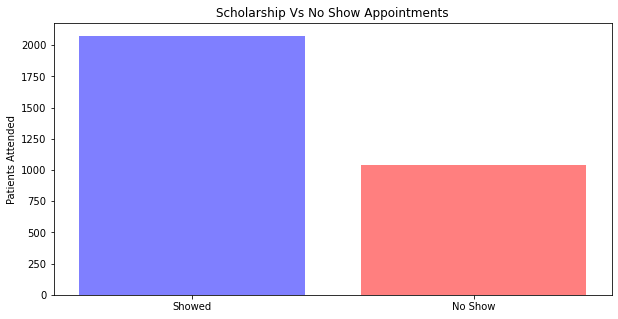

In [25]:
# Identify those with the aid 
df_scholar = df[df.Scholarship == 1]

print(pd.DataFrame(df_scholar.groupby(df_scholar.No_Show.name)[df.PatientId.name].count()))
# Plotting
fig, ax = plt.subplots(figsize=(10, 5))

# Plot Customizations
ax.bar(['Showed', 'No Show'], df_scholar.No_Show.value_counts(), color=['b', 'r'], alpha=0.5)
ax.set(title="Scholarship Vs No Show Appointments", 
      ylabel="Patients Attended")

# Show Plot
plt.show()

In [26]:
# Number of People with Scholarship
df.Scholarship.sum()

3116

    It seems that people with Scholarship like to attend their appointments, one way to look at this is that t-he Aid is given by the brazilian governoment and is accompanied by aiding education for the poor families. Missing such an opportunity may suspend these families from the programm. 

mean        std
No_Show Gender                      
0       F       34.692849  16.641309
        M       19.353261  17.876665
1       F       31.955763  15.202837
        M       18.147541  16.380942

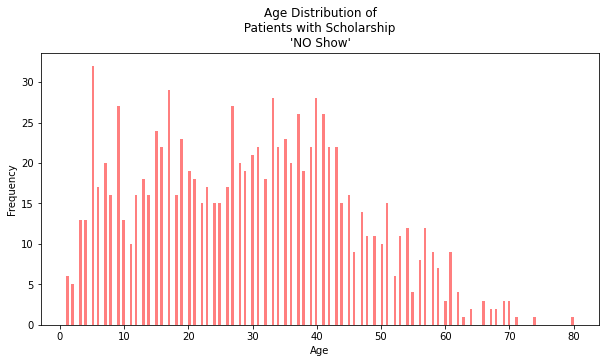

In [27]:
# Identify Patients with Scholarship and did not attend
df_scholar_no = df_scholar[df_scholar.No_Show == 1]

# Display Analytics
display(pd.DataFrame(df_scholar.groupby([df_scholar.No_Show.name,
                                         df_scholar.Gender.name])["Age"].describe().loc[:, ['mean', 'std']]))

# Plot the Age Distribution of these Patients 
fig, ax = plt.subplots(figsize=(10, 5))

# Plot Customizations 
ax.hist(df_scholar_no.Age, bins=200, alpha=0.5, color='r')
ax.set(title="Age Distribution of\n Patients with Scholarship \n'NO Show'", xlabel="Age", ylabel='Frequency')

plt.show()

### Which Neighbourhood has the most No Show Appointments  

In [28]:
# Get Columns names 
hoods = df.Neighbourhood.name 
no_show = df.No_Show.name 

# Get Data Frame with Only Neighbourhoods and No Shows
df_hoods = df.loc[:, [hoods, no_show]]

# Count No Shows in each District 
hoods_attend = {}
for district in df_hoods.Neighbourhood.unique():
    hoods_attend[district] = df_hoods[(df_hoods.Neighbourhood == district)&(df_hoods.No_Show == 1)].No_Show.sum()

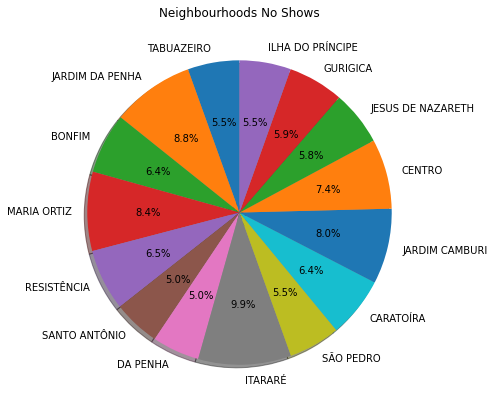

In [29]:
# filtering the Dictionary 
hoods_attend_simpl = {district: value for district, value in hoods_attend.items() if value >200}

# Plotting the Pie Chart
fig, ax = plt.subplots(figsize = (10, 7))

# Plot Customizations
ax.pie(hoods_attend_simpl.values(), labels=hoods_attend_simpl.keys(),
       autopct='%1.1f%%', shadow=True, startangle=90)
ax.set(title="Neighbourhoods No Shows")

# Show plot
plt.show()

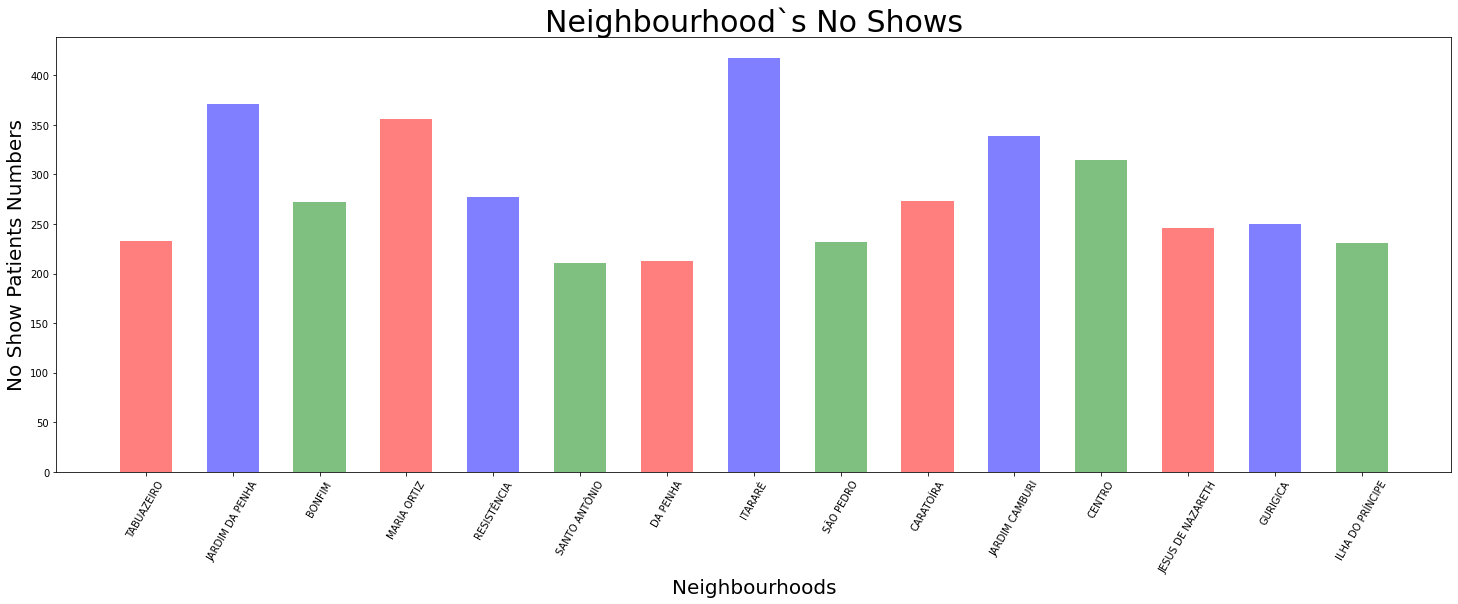

In [30]:
# Plotting a bar chart
fig, ax = plt.subplots(figsize=(25, 8))

#Customizing the plot 
ax.bar(hoods_attend_simpl.keys(), hoods_attend_simpl.values(), width=0.6, alpha=0.5, color=['r', 'b', 'g'])
ax.set_title("Neighbourhood`s No Shows", fontsize=30)
ax.set_xlabel('Neighbourhoods', fontsize = 20)
ax.set_ylabel('No Show Patients Numbers', fontsize = 20)

plt.setp(ax.get_xticklabels(), rotation = 60)
# Show Plot
plt.show()

    Itarare has the highest number of No Show Appointments in Brazil.

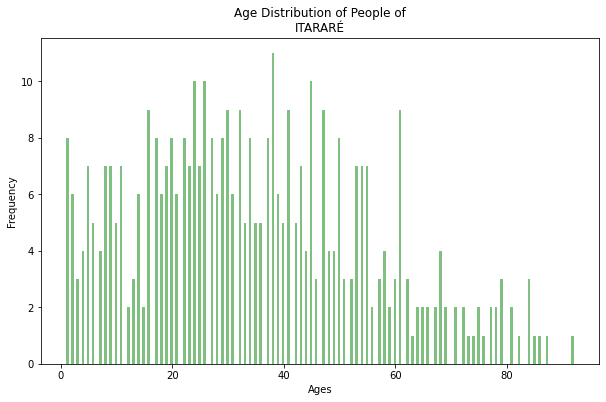

In [31]:
# Get All Patients from ITARARÉ
df_itarare = df[(df.Neighbourhood == 'ITARARÉ') & (df.No_Show == 1)]

# Plot Age Distribution of No Show Patients
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(df_itarare.Age, bins=200, color='g', alpha=0.5)
ax.set(title='Age Distribution of People of\nITARARÉ',
       xlabel='Ages', ylabel='Frequency')

plt.show()

### What are the important factors that affect the appointments show ups

In [32]:
# Function for plotting 2 variable counts piechart
def PieChart2(values: list, labels: list, title: str):
    fig, ax = plt.subplots(figsize=(10, 7))

    # Plot Customizations 
    ax.pie(values, labels=labels,
           autopct="%1.1f%%", startangle=90, colors=['#ff9999','#66b3ff'],
           explode=[0.05, 0], shadow=True)
    ax.set_title(title, fontsize=30)
    
    # Show Plot
    plt.show()
    
labels = ["Showed Up", "No Show"]

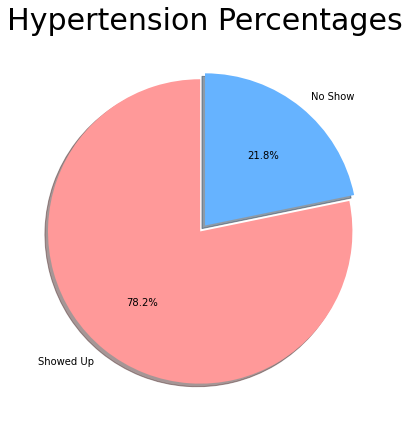

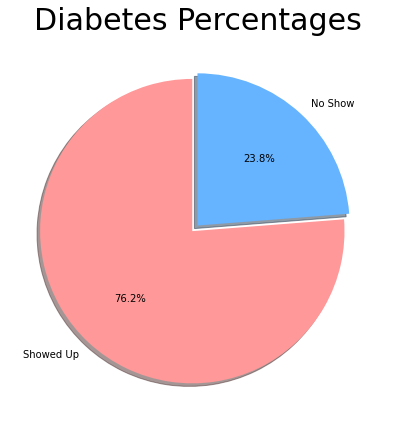

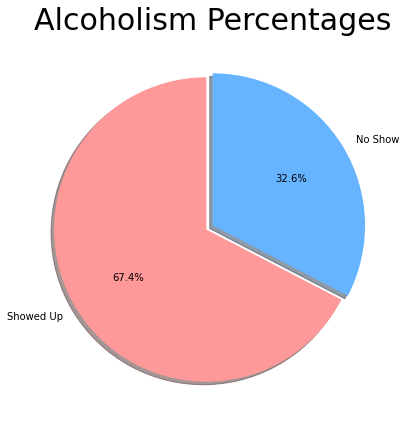

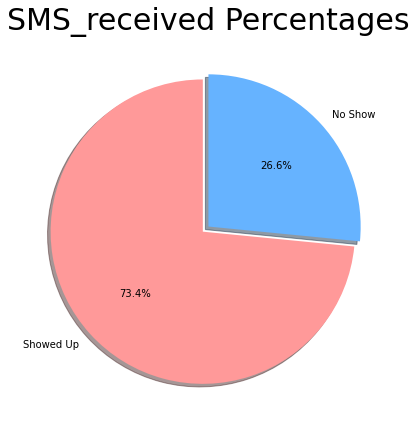

In [33]:
cols = np.r_[df.columns[8:11],[df.columns[12]]]
for col in cols:
    # Identify patiens with the columns disease
    df_col = df[df[col] == 1]
    
    # Count Showed ups and no shows
    show_count = df_col[df_col.No_Show == 0].No_Show.count()
    no_show_count = df_col[df_col.No_Show == 1].No_Show.count()    
    
    # Plot Pie Chart
    PieChart2([show_count, no_show_count], labels, col+' Percentages')
    

    Diseases of different kinds that are recorded in the dataset does not affecet a patients comming or not, A  very reasonable amount of patiens who have these disease shows up any way. Recieving an SMS also is a way to ensure that the patient is comming, Large proportion of the patients who showed up recieved an sms before the appointment, however it is not a major factor in the investigation.

In [34]:
# Group Handicaps Levels 
handicaps = df.groupby([df.Handicap, df.No_Show]).count().PatientId
total_numbers = handicaps.sum()

# Identifiy show ups and no shows in each level
handicaps_show = {}
handicaps_no_show = {}

# Loop over levels
for i in range(0, 5):
    for x in [0, 1]:
        if x == 0:
            handicaps_show[i] = handicaps[(i, x)]/total_numbers
        else:
            handicaps_no_show[i] = handicaps[(i, x)]/total_numbers

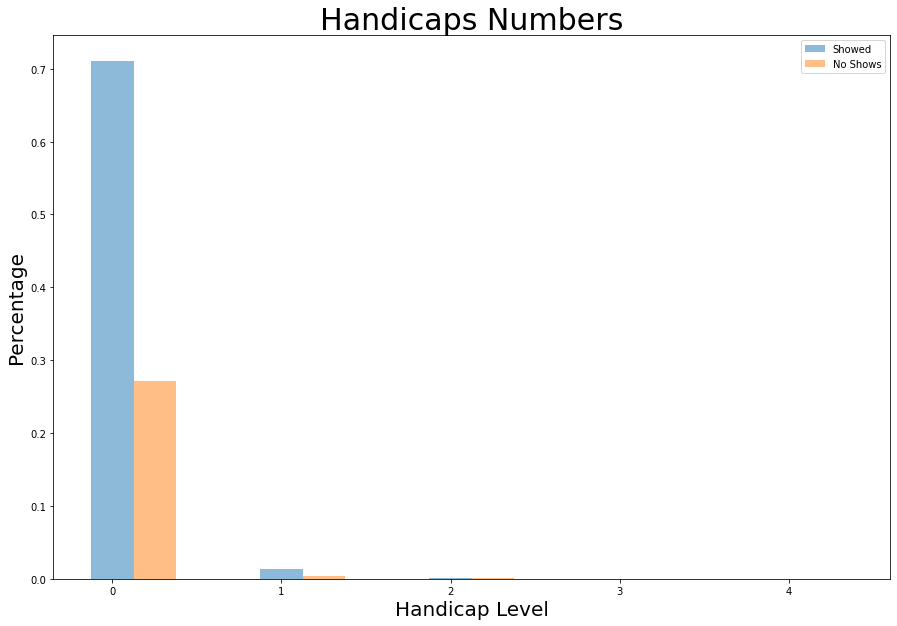

In [35]:
index = np.arange(5)
bar_width = 0.25

# Plot Counts in all levels
fig, ax = plt.subplots(figsize=(15, 10))

# Plot Customizations 
ax.bar(index, handicaps_show.values(), width=bar_width, label='Showed', alpha=0.5)
ax.bar(index+bar_width, handicaps_no_show.values(), width=bar_width, label="No Shows", alpha=0.5)
ax.set_title("Handicaps Numbers", fontsize=30)
ax.set_xlabel("Handicap Level", fontsize=20)
ax.set_ylabel("Percentage", fontsize=20)

# Show Plot
ax.legend()
plt.show()

### Is waiting time important ?

In [36]:
# Convert the Difference to seconds
df.Difference = df.Difference.dt.seconds

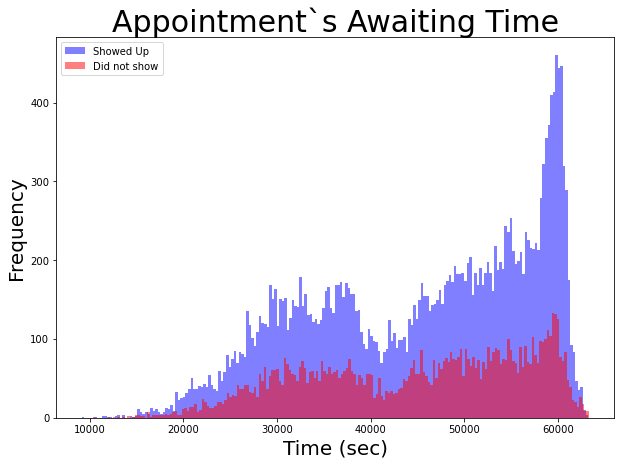

In [37]:
# Identify who showed who did not 
df_showed = df[df.No_Show == 0]
df_no_show = df[df.No_Show == 1]

# Plot the histgrams of both
fig, ax = plt.subplots(figsize=(10, 7))

# Plot Customizations 
ax.hist(df_showed.Difference, bins=200, color='b', alpha=0.5, label='Showed Up')
ax.hist(df_no_show.Difference, bins=200, color='r', alpha=0.5, label="Did not show")

ax.set_title('Appointment`s Awaiting Time', fontsize=30)
ax.set_xlabel('Time (sec)', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
ax.legend()
# show plot
plt.show()

<a id='conclusions'></a>
## Conclusions
Finally, After investigating the data set an diving into it\`s features, we can see that:
- A Scholarship is one of the important features of the investigation, Number of people who showed up was double those who did not.
- Having one of the diseases listed in the features of the dataset is also important people with these kind of disease are keen on attending their scheduled appointment.
- Waiting Time is important, although it may be because the data set just have more numbers of people showing up.
- Recieving an SMS is a good reminder to the patient and 70% of them showed up.

However, we did not yet apply any statistical analysis this is just an exploration of the features and visualizing our findings, the data seems to have more numbers of people showing up which does not say that there is a correlation between one of the features and the target, applying statistical analysis to the problem may provide the solution to our answer. 


In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0